# A Kaggle Competition-Santander Customer Transaction Prediction

In that project I will try to solve the problem of Santander Customer Transaction Prediction. This is a classfication problem. Firstly I will use a few classical machine learning algorithms to solve the problem. And then I will use a deep learning model to solve the problem. But my data has too much columns. That's why I will drop some of them. I will decide these as follows: I will train a simple model and extract the columns according to their feature importance. My threshold value 0.0035. But if you want to change the threshold value, you can do so. Finally I will predict the test data. If you want to learn more about this project, you can check the [project description](https://www.kaggle.com/competitions/santander-customer-transaction-prediction).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
sample_submission = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv')
train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
sample_submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


<Axes: >

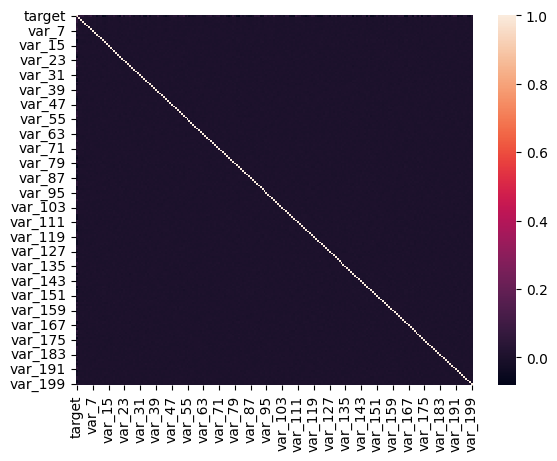

In [7]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
abs(train.corr(numeric_only=True)['target']).sort_values(ascending=False)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
             ...   
var_38     0.000970
var_17     0.000864
var_30     0.000638
var_27     0.000582
var_185    0.000053
Name: target, Length: 201, dtype: float64

In [10]:
from sklearn.tree import DecisionTreeClassifier
x=train.drop(['ID_code', 'target'], axis=1)
y=train['target']
clf = DecisionTreeClassifier()
clf.fit(x, y)
pred = clf.predict(x)
feature_importance = clf.feature_importances_
columns=x.columns
feature_importance_sorting = sorted(zip(columns, feature_importance), key=lambda x: x[1], reverse=True)
for f, i in feature_importance_sorting:
    print(f"{f}: {i}")

var_81: 0.013551252776494896
var_12: 0.011470003374384054
var_26: 0.011108915943706964
var_139: 0.010991515248310798
var_166: 0.010461124457246077
var_80: 0.00999732743383018
var_110: 0.009857443755446341
var_53: 0.009745902901989395
var_76: 0.00933807598985867
var_22: 0.009214902703443504
var_174: 0.00896117700572859
var_146: 0.008837659264359839
var_6: 0.008518328815446199
var_1: 0.008332489088163066
var_190: 0.008263605681826042
var_179: 0.008028099470813694
var_78: 0.007824420384159087
var_21: 0.0077989384023273815
var_2: 0.0076147292233431675
var_191: 0.00760466868726135
var_165: 0.007581050424650365
var_133: 0.007566551006703689
var_13: 0.007500306934027561
var_99: 0.007482886735144654
var_121: 0.007440346401397639
var_109: 0.007406702341999897
var_9: 0.007249898057024273
var_40: 0.007129980317830988
var_34: 0.0071190905276634475
var_177: 0.007035895882905679
var_94: 0.007035195991556479
var_164: 0.006874464205557967
var_148: 0.006845768104300401
var_0: 0.00672748676629763
var_44

In [11]:
train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [12]:
for f, i in feature_importance_sorting:
    if i < 0.0035:
        train.drop(f, axis=1, inplace=True)
        test.drop(f, axis=1, inplace=True)
    else:
        continue

In [13]:
from sklearn.model_selection import train_test_split
x=train.drop(['ID_code', 'target'], axis=1)
y=train['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

2024-05-13 13:36:56.364984: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 13:36:56.365086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 13:36:56.529923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model = Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(80, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(30, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(20, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test),batch_size=64, verbose=1)

Epoch 1/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8988 - loss: 0.2640 - val_accuracy: 0.8992 - val_loss: 0.2806
Epoch 2/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9062 - loss: 0.2565 - val_accuracy: 0.9019 - val_loss: 0.2904
Epoch 3/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9070 - loss: 0.2530 - val_accuracy: 0.9083 - val_loss: 0.2721
Epoch 4/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9090 - loss: 0.2487 - val_accuracy: 0.9051 - val_loss: 0.3401
Epoch 5/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9086 - loss: 0.2514 - val_accuracy: 0.8945 - val_loss: 0.3165
Epoch 6/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9092 - loss: 0.2492 - val_accuracy: 0.8807 - val_loss: 0.3542
Epoch 7/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9095 - loss: 0.2488 - val_accuracy: 0.8628 - val_loss: 0.3346
Epoch 8/200
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9083 - loss: 0

In [18]:
model.save('model.h5')

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
model=l.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.91115

In [47]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
model=d.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.834925

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c0371c905e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


0.8973

In [56]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [57]:
test.head()

,ID_code,var_0,var_1,var_2,var_5,var_6,var_8,var_9,var_11,var_12,var_13,var_14,var_15,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_32,var_33,var_34,var_35,var_36,var_37,var_39,var_40,var_41,var_43,var_44,var_46,var_47,var_48,var_49,var_51,var_52,var_53,var_55,var_56,var_57,var_58,var_59,var_60,var_63,var_66,var_67,var_68,var_69,var_71,var_72,var_75,var_76,var_78,var_79,var_80,var_81,var_82,var_83,var_85,var_86,var_87,var_88,var_89,var_91,var_92,var_93,var_94,var_95,var_97,var_98,var_99,var_100,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_121,var_122,var_123,var_125,var_126,var_127,var_128,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_154,var_155,var_157,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_172,var_173,var_174,var_175,var_177,var_178,var_179,var_180,var_181,var_183,var_184,var_185,var_186,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,-2.3805,5.8493,2.1337,8.8100,-4.3554,13.9696,0.3458,7.5408,14.5001,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,8.7625,-15.6305,18.8766,11.8362,13.3680,12.1776,8.7714,17.2011,16.8508,14.4069,-4.8525,7.3213,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,0.8705,5.9744,17.4851,5.0125,-1.4230,0.8018,-4.7906,21.7205,7.3075,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,20.4588,4.7945,20.4160,13.1633,7.9307,7.0834,15.2324,10.1416,5.9156,-0.5775,30.3238,2.1251,1.8585,-9.2198,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,11.4164,0.4564,9.4006,12.4929,14.1240,4.0388,-4.4442,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,18.9880,1.0842,-4.5103,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,29.0849,8.4685,18.1317,12.2818,10.2226,-5.5579,2.2926,-4.5358,10.3903,3.9697,31.3521,-1.1651,9.2874,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,-4.0117,6.0196,-4.4131,5.9739,-0.3310,14.1129,2.5667,5.4988,14.1853,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,-1.5536,10.0309,3.1337,11.7664,2.1782,13.5322,-17.3834,6.3806,12.5589,25.3930,1.5776,6.8481,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-1.7401,4.4307,16.0005,5.0306,-7.3365,0.6992,-0.7772,18.1896,6.9388,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,20.4525,9.4951,9.6343,8.1252,2.6059,7.1848,15.3484,10.6522,5.9897,0.3392,29.8204,1.9998,-1.4166,-1.7257,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,11.6704,3.1215,8.5093,12.0099,14.2372,-6.1600,-5.6690,11.0605,0.4583,9.7974,7.0891,2.6849,8.4970,15.7774,4.8775,3.6129,6.7530,11.1003,15.3593,2.2105,8.2280,9.0717,-5.0947,8.7644,-2.2873,4.1240,-13.3006,18.7454,9.3783,1.5284,7.7732,1.4316,3.3619,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,29.9227,-5.6274,10.5018,9.6083,8.1696,-4.3605,5.2110,0.4087,12.0030,5.8496,25.1958,-8.8468,11.8263,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,9.8052,4.8950,1.5233,8.3442,-3.0422,13.6751,3.8183,10.8535,14.2126,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,0.8804,-19.0841,5.2272,12.1801,8.3565,10.0921,-20.8504,8.6758,8.1292,10.6869,-0.6434,5.6510,25.

In [60]:
prediction_data = test.drop(['ID_code'], axis=1)
predicitons = model.predict(prediction_data).argmax(axis=1)
prediction_data["target"] = predicitons

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [61]:
submission = pd.DataFrame()
submission["ID_code"] = test["ID_code"]
submission["target"] = prediction_data["target"]
submission.to_csv("submission.csv", index=False)

I developed a solution to this project. Some points can be improved, but I still think it is a good solution. It is obvious that customer satisfaction can be improved with less cost and time in the world. This can be done with machine learning.